In [40]:
import pandas as pd
import requests
import os
import time
import json
import random

# Paths and constants
csv_path = 'franceinter.csv'
transcription_output_json  = 'transcription_results.json'

gladia_key = 'XXXXXXX'
gladia_headers = {
    'x-gladia-key': gladia_key,
    'Content-Type': 'application/json'
}

# Load existing JSON results (if exists)
if os.path.exists(transcription_output_json ):
    with open(transcription_output_json , 'r', encoding='utf-8') as f:
        existing_results = json.load(f)
    print(f"✅ Loaded {len(existing_results)} existing transcriptions")
else:
    existing_results = []
    print("📝 Starting fresh - no existing transcriptions")

✅ Loaded 146 existing transcriptions


In [26]:
import json

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

print(f"Total entries in political_analysis.json: {len(political)}\n")

for i, entry in enumerate(political):
    status = entry.get('status', 'unknown')
    title = entry.get('title', 'No title')[:70]
    has_analysis = 'analysis' in entry
    
    if status == 'success' and has_analysis:
        print(f"✅ {i+1}. {title}")
    elif status == 'success' and not has_analysis:
        print(f"⚠️  {i+1}. {title} [NO ANALYSIS KEY - wrong data]")
    else:
        print(f"❌ {i+1}. {title} [status: {status}]")

# Summary
valid = [e for e in political if e.get('status') == 'success' and 'analysis' in e]
invalid = [e for e in political if 'analysis' not in e]

print(f"\n{'='*50}")
print(f"Valid analyses: {len(valid)}")
print(f"Invalid entries (no 'analysis' key): {len(invalid)}")

Total entries in political_analysis.json: 145

✅ 1. Bras de fer autour de la visite du prince héritier d’Arabie Saoudite c
✅ 2. « Le matriarcat… si c’était le cas, on n’en serait peut-être pas là au
✅ 3. La Chine s’en prend à la nouvelle première ministre japonaise, « sorci
✅ 4. CNews : chère liberté d'expression* (*sous conditions)
✅ 5. Fin de l'alcool à la buvette de l'Assemblée : l'avis de l'happy hour d
✅ 6. L’école doit-elle changer de rythme ?
✅ 7. Avec Jodie Foster  : "pourquoi le rôle du héros serait réservé aux hom
✅ 8. Le journal de 07h00 du lundi 17 novembre 2025
✅ 9. Allain Bougrain-Dubourg, l’ami des oiseaux depuis 40 ans
✅ 10. Exil fiscal, un tabou a sauté
✅ 11. Jordan Bardella devant tous les présidentiables, y compris sa mentor
✅ 12. Ceci n'est pas une chronique politique
✅ 13. Sardou, de Bercy à Bercy
✅ 14. Rue d'Aubagne : chronique d'une catastrophe annoncée
✅ 15. Choose France, opération calinothérapie
✅ 16. Les faux-semblants de l'accord franco-algérien de 1968
✅ 17

In [27]:
import pandas as pd

df = pd.read_csv('franceinter.csv')
df['isProcessed'] = df['isProcessed'].astype(str).str.lower().isin(['true', '1', 'yes'])

processed = df[df['isProcessed'] == True]

print(f"Total marked as processed in CSV: {len(processed)}\n")

for i, (idx, row) in enumerate(processed.iterrows()):
    title = row.get('title', 'No title')[:70]
    emission = row.get('emission', 'Unknown')
    print(f"{i+1}. [{emission}] {title}")

print(f"\n{'='*50}")
print(f"Total: {len(processed)}")

Total marked as processed in CSV: 149

1. [Affaire Sensible] Rosa Parks, celle qui s’est tenue debout en restant assise
2. [Affaire Sensible] Le charnier de la faculté de médecine Paris-Descartes
3. [Affaire Sensible] La chute de l’opération Barkhane
4. [Affaire Sensible] Kerouac, au bout du rouleau
5. [Affaire Sensible] L’affaire des fuites
6. [Affaire Sensible] Rue d'Aubagne : chronique d'une catastrophe annoncée
7. [Affaire Sensible] 1966, le « scandale » des Paravents au théâtre de France
8. [Affaire Sensible] La faute de l'abbé Cottard
9. [Affaire Sensible] Dior et misère : la chute de Marcel Boussac
10. [Affaire Sensible] Birobidjan, une Terre promise en Sibérie
11. [Affaire Sensible] Fahrenheit 9/11 : docu choc et palme d’or
12. [Affaire Sensible] La censure du roman “Ravages” de Violette Leduc
13. [Affaire Sensible] Aimé Césaire et le Parti communiste, un divorce dans le fracas des mot
14. [Affaire Sensible] Paul Deschanel, nuit de folie et train d'enfer pour le Président
15. [

In [28]:
import json

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

print(f"Total entries in transcription_results.json: {len(transcriptions)}\n")

for i, entry in enumerate(transcriptions):
    status = entry.get('status', 'unknown')
    title = entry.get('title', 'No title')[:60]
    emission = entry.get('emission', 'Unknown')[:20]
    
    if status == 'success':
        num_speakers = entry.get('num_speakers', 0)
        trans_len = len(entry.get('transcription', ''))
        print(f"✅ {i+1}. [{emission}] {title} ({num_speakers} speakers, {trans_len} chars)")
    else:
        error = entry.get('error', 'Unknown error')[:40]
        print(f"❌ {i+1}. [{emission}] {title} - {error}")

# Summary
success = [e for e in transcriptions if e.get('status') == 'success']
failed = [e for e in transcriptions if e.get('status') != 'success']

print(f"\n{'='*60}")
print(f"Successful transcriptions: {len(success)}")
print(f"Failed transcriptions: {len(failed)}")

Total entries in transcription_results.json: 145

✅ 1. [Le billet de Bertran] Fin de l'alcool à la buvette de l'Assemblée : l'avis de l'ha (3 speakers, 3231 chars)
✅ 2. [Journal de 07h00] Le journal de 07h00 du lundi 17 novembre 2025 (10 speakers, 15066 chars)
✅ 3. [Géopolitique] Bras de fer autour de la visite du prince héritier d’Arabie  (2 speakers, 3584 chars)
✅ 4. [« Le matriarcat… si ] « Le matriarcat… si c’était le cas, on n’en serait peut-être (7 speakers, 7146 chars)
✅ 5. [Géopolitique] La Chine s’en prend à la nouvelle première ministre japonais (3 speakers, 3753 chars)
✅ 6. [Totemic] Avec Jodie Foster  : "pourquoi le rôle du héros serait réser (10 speakers, 46503 chars)
✅ 7. [Le billet de Bertran] CNews : chère liberté d'expression* (*sous conditions) (3 speakers, 3444 chars)
✅ 8. [L'édito politique] L’école doit-elle changer de rythme ? (3 speakers, 3447 chars)
✅ 9. [La Terre au carré] Allain Bougrain-Dubourg, l’ami des oiseaux depuis 40 ans (10 speakers, 38122 chars)
✅ 10.

In [29]:
df = pd.read_csv(csv_path)

# Ensure isProcessed column exists
if 'isProcessed' not in df.columns:
    df['isProcessed'] = False
    df.to_csv(csv_path, index=False)
    print("Added 'isProcessed' column to CSV")

# Convert to boolean (handles 'True', 'true', True, 1, etc.)
df['isProcessed'] = df['isProcessed'].astype(str).str.lower().isin(['true', '1', 'yes'])

# Filter rows NOT yet processed
df_to_process = df[df['isProcessed'] == False].copy()

print(f"Total rows: {len(df)}")
print(f"Already processed: {len(df) - len(df_to_process)}")
print(f"Remaining to process: {len(df_to_process)}")

# Show distribution
print(f"\n📊 Distribution of remaining emissions:")
print(df_to_process['emission'].value_counts())

Total rows: 237
Already processed: 149
Remaining to process: 88

📊 Distribution of remaining emissions:
emission
L’éco d’Inter                 32
Affaire Sensible              16
Zoom Zoom Zen                 15
La Terre au carré             15
On n'arrete pas l'éco          4
Charline explose les faits     3
L'édito politique              1
Totemic                        1
Journal de 07h00               1
Name: count, dtype: int64


In [30]:
# Take ONE random episode per emission type (balanced sampling)
max_emissions = 10

# Group by emission, take 1 random from each
df_one_per_emission = df_to_process.groupby('emission').sample(n=1)

# Then take max_emissions randomly from those
if len(df_one_per_emission) > max_emissions:
    df_sample = df_one_per_emission.sample(n=max_emissions)
else:
    df_sample = df_one_per_emission

print(f"Selected {len(df_sample)} emissions for processing:")
for idx, row in df_sample.iterrows():
    print(f"  - [{row['emission']}] {row['title'][:50]}...")

Selected 9 emissions for processing:
  - [Affaire Sensible] Harlem, 21 février 1965 : Malcolm X est mort...
  - [Charline explose les faits] L'Audiovisuel public est-il de gauche ?...
  - [Journal de 07h00] Le journal de 07h00 du dimanche 16 novembre 2025...
  - [L'édito politique] Budget : méthode Lecornu ou méthode Coué ?...
  - [La Terre au carré] Saumon d'élevage : l'envers du décor d'une industr...
  - [L’éco d’Inter] Distribution : les agriculteurs pris en étau ?...
  - [On n'arrete pas l'éco] L'intelligence artificielle et son déploiement à t...
  - [Totemic] durée : 00:52:41 - Totémic - par : Rebecca Manzoni...
  - [Zoom Zoom Zen] Vers l’interdiction de la plateforme Shein en Fran...


In [31]:
def format_transcript_with_speakers(utterances):
    """Format utterances with speaker labels."""
    lines = []
    current_speaker = None
    
    for utt in utterances:
        speaker = utt.get('speaker', 'Unknown')
        text = utt.get('text', '').strip()
        
        if speaker != current_speaker:
            lines.append(f"\n[Speaker {speaker}]: {text}")
            current_speaker = speaker
        else:
            lines[-1] += f" {text}"
    
    return ''.join(lines).strip()


def transcribe_one(row):
    """Transcribe a single audio file with speaker diarization."""
    
    audio_url = row['mp3link']
    emission = row.get('emission', '')
    
    try:
        # Step 1: Initiate transcription
        init_response = requests.post(
            'https://api.gladia.io/v2/pre-recorded',
            headers=gladia_headers,
            json={
                'audio_url': audio_url,
                'language': 'fr',
                'diarization': True,
                'diarization_config': {
                    'min_speakers': 1,
                    'max_speakers': 10,
                }
            },
            timeout=60
        )
        init_response.raise_for_status()
        
        result = init_response.json()
        result_url = result.get('result_url')
        
        # Step 2: Poll for result
        status = 'processing'
        poll_count = 0
        max_polls = 120
        
        while status in ['queued', 'processing'] and poll_count < max_polls:
            time.sleep(10)
            poll_count += 1
            
            poll_response = requests.get(
                result_url,
                headers={'x-gladia-key': gladia_key},
                timeout=30
            )
            poll_response.raise_for_status()
            result = poll_response.json()
            status = result.get('status')
            print(f"  Polling... {status} (attempt {poll_count})")
        
        if status == 'done':
            transcription_data = result.get('result', {}).get('transcription', {})
            utterances = transcription_data.get('utterances', [])
            full_transcript = transcription_data.get('full_transcript', '')
            
            if utterances:
                transcription_text = format_transcript_with_speakers(utterances)
            else:
                transcription_text = full_transcript
            
            return {
                'status': 'success',
                'emission': emission,
                'mp3link': audio_url,
                'title': row.get('title', ''),
                'description': row.get('description', ''),
                'transcription': transcription_text,
                'diarization': utterances,
                'num_speakers': len(set(u.get('speaker') for u in utterances)) if utterances else 0
            }
        else:
            return {
                'status': 'failed',
                'emission': emission,
                'mp3link': audio_url,
                'error': f'Final status: {status}'
            }
    
    except Exception as e:
        return {
            'status': 'error',
            'emission': emission,
            'mp3link': audio_url,
            'error': str(e)
        }

In [32]:
# Process and INCREMENT results
transcription_results = existing_results.copy()  # ← RENAMED
new_count = 0

for idx, (df_idx, row) in enumerate(df_sample.iterrows()):
    emission = row.get('emission', '')
    title = row.get('title', f'Row_{df_idx}')[:50]
    print(f"\n[{idx+1}/{len(df_sample)}] [{emission}] {title}...")
    
    result = transcribe_one(row)
    transcription_results.append(result)  # ← RENAMED
    
    if result['status'] == 'success':
        print(f"  ✅ Success! ({len(result['transcription'])} chars, {result['num_speakers']} speakers)")
        new_count += 1
    else:
        print(f"  ❌ Failed: {result.get('error', 'Unknown error')}")
    
    # Mark as processed in CSV (success or fail)
    df.at[df_idx, 'isProcessed'] = True
    
    # Save progress after each
    with open(transcription_output_json, 'w', encoding='utf-8') as f:  # ← RENAMED
        json.dump(transcription_results, f, ensure_ascii=False, indent=2)  # ← RENAMED
    
    df.to_csv(csv_path, index=False)

print(f"\n{'='*50}")
print(f"✅ New transcriptions: {new_count}")
print(f"📊 Total in JSON: {len(transcription_results)}")  # ← RENAMED
print(f"📁 JSON saved to: {transcription_output_json}")  # ← RENAMED
print(f"📁 CSV updated: {csv_path}")


[1/9] [Affaire Sensible] Harlem, 21 février 1965 : Malcolm X est mort...
  ❌ Failed: 401 Client Error: Unauthorized for url: https://api.gladia.io/v2/pre-recorded

[2/9] [Charline explose les faits] L'Audiovisuel public est-il de gauche ?...


KeyboardInterrupt: 

In [ ]:
# ========================================
# POLITICAL ANALYSIS WITH GPT-4o-mini
# ========================================
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import threading
import requests
import json
import time
import os
import re

openai_key = 'XXXXXXXXXX'
input_json = 'transcription_results.json'
analysis_output_json = 'political_analysis.json'

# ========================================
# 1. LOAD TRANSCRIPTIONS
# ========================================
with open(input_json, 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)
print(f"📥 Loaded {len(transcriptions)} transcriptions")

# ========================================
# 2. LOAD EXISTING POLITICAL ANALYSIS (INCxREMENT!)
# ========================================
if os.path.exists(analysis_output_json):
    with open(analysis_output_json, 'r', encoding='utf-8') as f:
        existing_analysis = json.load(f)
    print(f"📥 Loaded {len(existing_analysis)} existing political analyses")
else:
    existing_analysis = []
    print("📝 No existing political analysis, starting fresh")

# ========================================
# 3. FIND WHAT'S NEW (not yet analyzed)
# ========================================
already_analyzed_links = set(r.get('mp3link') for r in existing_analysis)

transcriptions_to_analyze = [
    t for t in transcriptions 
    if t.get('status') == 'success' 
    and len(t.get('transcription', '')) > 100
    and t.get('mp3link') not in already_analyzed_links  # Skip already done
]

print(f"🔍 Already analyzed: {len(already_analyzed_links)}")
print(f"🆕 NEW to analyze: {len(transcriptions_to_analyze)}")

# ========================================
# 4. START WITH EXISTING (INCREMENT!)
# ========================================
results = existing_analysis.copy()  # ✅ START WITH EXISTING!
results_lock = threading.Lock()
tqdm_lock = threading.Lock()

📥 Loaded 146 transcriptions
📥 Loaded 145 existing political analyses
🔍 Already analyzed: 145
🆕 NEW to analyze: 0


In [10]:
# ⬇️ LOAD EXISTING POLITICAL ANALYSIS (if file exists)
if os.path.exists(analysis_output_json):
    with open(analysis_output_json, 'r', encoding='utf-8') as f:
        existing_analysis = json.load(f)
    print(f"Loaded {len(existing_analysis)} existing analyses from {analysis_output_json}")
else:
    existing_analysis = []
    print(f"No existing {analysis_output_json}, starting fresh")

# ⬇️ GET ALREADY ANALYZED MP3 LINKS (to skip them)
already_analyzed = set(r.get('mp3link') for r in existing_analysis)

# Filter: successful transcriptions NOT already analyzed
transcriptions_to_analyze = [
    t for t in transcriptions 
    if t.get('status') == 'success' 
    and len(t.get('transcription', '')) > 100
    and t.get('mp3link') not in already_analyzed  # ⬅️ Skip already done
]

print(f"Total transcriptions: {len(transcriptions)}")
print(f"Already analyzed: {len(already_analyzed)}")
print(f"NEW to analyze: {len(transcriptions_to_analyze)}")

# ⬇️ START WITH EXISTING DATA
results = existing_analysis.copy()  # ✅ START WITH EXISTING!
results_lock = threading.Lock()
tqdm_lock = threading.Lock()

Loaded 141 existing analyses from political_analysis.json
Total transcriptions: 148
Already analyzed: 141
NEW to analyze: 6


In [11]:
SYSTEM_PROMPT = """Tu es un analyste média et politique français expert.

## OBJECTIF
Analyser le BIAIS ÉDITORIAL et l'ORIENTATION POLITIQUE de chaque intervenant (speaker) dans cette transcription.

## FORMAT DE LA TRANSCRIPTION
La transcription contient des marqueurs [Speaker X] qui identifient différents intervenants:
- Speaker 0, Speaker 1, Speaker 2, etc.
- Chaque speaker est une personne différente (journaliste, invité, personne interviewée dans la rue, etc.)

## CONTENU À IGNORER
- Les publicités, jingles, annonces radio
- Les génériques d'émission
- Tout contenu promotionnel

## ANALYSE PAR SPEAKER
Pour CHAQUE speaker identifié, analyse:
1. Son RÔLE probable (journaliste/animateur, invité expert, personne dans la rue, etc.)
2. Ses PROPOS et leur orientation politique
3. Son TON (neutre, engagé, critique, etc.)

## CATÉGORIES POLITIQUES FRANÇAISES
- Extrême gauche (LFI, NPA): anticapitalisme, lutte des classes, anti-impérialisme radical
- Social-démocrate (PS, EELV): réformisme, justice sociale, écologie, féminisme, humanisme
- Centre (Renaissance, MoDem): pragmatisme, libéralisme modéré, européisme
- Droite (LR): conservatisme, libéralisme économique, autorité, tradition
- Extrême droite (RN, Reconquête): nationalisme, anti-immigration, souverainisme

## RÈGLES
1. Analyse CHAQUE speaker séparément
2. Si un speaker est neutre/factuel → répartis équitablement (20% chaque)
3. Les pourcentages de chaque speaker doivent totaliser 100%
4. Fournis aussi une analyse GLOBALE de l'émission

## FORMAT DE RÉPONSE
Réponds UNIQUEMENT avec un JSON valide:
{
    "speakers": {
        "0": {
            "role_probable": "<journaliste|invité|micro-trottoir|autre>",
            "description": "<brève description de ce que dit cette personne>",
            "extreme_gauche": <0-100>,
            "social_democrate": <0-100>,
            "centre": <0-100>,
            "droite": <0-100>,
            "extreme_droite": <0-100>,
            "ton": "<neutre|engagé|critique|sympathique|hostile>",
            "justification": "<1-2 phrases expliquant l'orientation>"
        },
        "1": { ... },
        "2": { ... }
    },
    "analyse_globale": {
        "extreme_gauche": <0-100>,
        "social_democrate": <0-100>,
        "centre": <0-100>,
        "droite": <0-100>,
        "extreme_droite": <0-100>,
        "biais_editorial": "<neutre|léger|marqué|fort>",
        "justification": "<2-3 phrases sur le biais éditorial global de l'émission>"
    },
    "contenu_insuffisant": <true|false>
}"""

In [12]:
def analyze_transcript(item: dict) -> dict:
    """Analyze a single transcript with GPT-4o-mini (per-speaker analysis)."""
    
    title = item.get('title', item.get('Title', item.get('emission', 'Unknown')))
    emission = item.get('emission', '')
    transcript = item.get('transcription', '')
    
    # Truncate if too long
    max_chars = 300000
    if len(transcript) > max_chars:
        transcript = transcript[:max_chars] + "... [tronqué]"
    
    # Count speakers for context
    import re
    speakers_found = set(re.findall(r'\[Speaker (\d+)\]', transcript))
    num_speakers = len(speakers_found)
    
    try:
        response = requests.post(
            'https://api.openai.com/v1/chat/completions',
            headers={
                'Authorization': f'Bearer {openai_key}',
                'Content-Type': 'application/json'
            },
            json={
                'model': 'gpt-4.1-mini',
                'messages': [
                    {'role': 'system', 'content': SYSTEM_PROMPT},
                    {'role': 'user', 'content': f"Cette transcription contient {num_speakers} speakers différents.\n\nAnalyse ce transcript:\n\n{transcript}"}
                ],
                'temperature': 0.3,
                'max_tokens': 2000  # Increased for per-speaker analysis
            },
            timeout=120
        )
        response.raise_for_status()
        
        content = response.json()['choices'][0]['message']['content']
        
        # Clean up potential markdown code blocks
        content = content.strip()
        if content.startswith('```'):
            content = content.split('```')[1]
            if content.startswith('json'):
                content = content[4:]
        content = content.strip()
        
        analysis = json.loads(content)
        
        return {
            'status': 'success',
            'emission': emission,
            'title': title, 
            'mp3link': item.get('mp3link', ''),
            'num_speakers': num_speakers,
            'analysis': analysis
        }
    
    except json.JSONDecodeError as e:
        return {
            'status': 'failed',
            'emission': emission,
            'title': title, 
            'error': f'JSON parse error: {str(e)}',
            'raw_response': content if 'content' in locals() else None
        }
    except Exception as e:
        return {
            'status': 'failed',
            'emission': emission,
            'title': title, 
            'error': str(e)
        }

In [13]:
# ========================================
# RUN PARALLEL ANALYSIS
# ========================================
max_workers = 5

if len(transcriptions_to_analyze) == 0:
    print("✅ Nothing new to analyze!")
else:
    print(f"\n{'='*60}")
    print(f"POLITICAL ANALYSIS WITH GPT-4o-mini (PER-SPEAKER)")
    print(f"{len(transcriptions_to_analyze)} NEW episodes, {max_workers} workers")
    print(f"{'='*60}\n")

    success_count = 0
    failed_count = 0

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_item = {
            executor.submit(analyze_transcript, item): item
            for item in transcriptions_to_analyze
        }
        
        for future in tqdm(as_completed(future_to_item),
                           total=len(transcriptions_to_analyze),
                           desc="Analyzing",
                           unit="episode",
                           colour="blue"):
            
            result = future.result()
            
            with results_lock:
                results.append(result)
                # Save EVERY time, inside the lock
                with open(analysis_output_json, 'w', encoding='utf-8') as f:  # ← FIXED
                    json.dump(results, f, ensure_ascii=False, indent=2)
            
            with tqdm_lock:
                if result['status'] == 'success':
                    tqdm.write(f"✅ {result['title'][:40]} ({result['num_speakers']} speakers)")
                    success_count += 1
                else:
                    tqdm.write(f"❌ {result['title'][:40]} | {result.get('error', 'Unknown error')}")
                    failed_count += 1

    # Final save
    with open(analysis_output_json, 'w', encoding='utf-8') as f:  # ← FIXED
        json.dump(results, f, ensure_ascii=False, indent=2)

    print(f"\n{'='*60}")
    print(f"✅ New successes: {success_count}")
    print(f"❌ New failures: {failed_count}")
    print(f"📊 Total analyses: {len(results)}")
    print(f"{'='*60}")
    print(f"\n📁 Saved to: {analysis_output_json}")  # ← FIXED


POLITICAL ANALYSIS WITH GPT-4o-mini (PER-SPEAKER)
6 NEW episodes, 5 workers



Analyzing:  17%|█▋        | 1/6 [00:06<00:30,  6.15s/episode]

✅ De la vie sous-marine sur d'anciennes bo (2 speakers)


Analyzing:  33%|███▎      | 2/6 [00:06<00:11,  2.89s/episode]

✅ Souviens-toi, c'était vendredi (2 speakers)


Analyzing:  50%|█████     | 3/6 [00:11<00:10,  3.64s/episode]

✅ La statue de Dalida (2 speakers)


Analyzing:  67%|██████▋   | 4/6 [00:18<00:10,  5.07s/episode]

✅ Le charnier de la faculté de médecine Pa (10 speakers)


Analyzing:  83%|████████▎ | 5/6 [00:21<00:04,  4.44s/episode]

❌ Avec Petter Bryman, analyste principal e | JSON parse error: Unterminated string starting at: line 170 column 22 (char 7305)


Analyzing: 100%|██████████| 6/6 [00:23<00:00,  3.86s/episode]

❌ Avec Laurence Poirier-Dietz, directrice  | JSON parse error: Unterminated string starting at: line 177 column 24 (char 7205)

✅ New successes: 4
❌ New failures: 2
📊 Total analyses: 147

📁 Saved to: political_analysis.json


In [14]:
import pandas as pd
import json

# ============================================
# LOAD ALL FILES
# ============================================
df = pd.read_csv('franceinter.csv')
df['isProcessed'] = df['isProcessed'].astype(str).str.lower().isin(['true', '1', 'yes'])

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

print("BEFORE:")
print(f"  CSV processed=True: {df['isProcessed'].sum()}")
print(f"  transcription_results.json: {len(transcriptions)}")
print(f"  political_analysis.json: {len(political)}")

# ============================================
# GET LINKS FROM EACH SOURCE
# ============================================
transcription_links = set(t.get('mp3link') for t in transcriptions)
political_links = set(p.get('mp3link') for p in political if 'analysis' in p)

# ============================================
# CHECK EACH CSV ROW WHERE isProcessed=True
# ============================================
to_reset = []  # CSV rows to set back to False
to_remove_from_transcriptions = []  # Links to remove from transcription_results

processed_rows = df[df['isProcessed'] == True]

print(f"\n{'='*60}")
print("CHECKING EACH PROCESSED ROW...")
print("="*60 + "\n")

for idx, row in processed_rows.iterrows():
    link = row['mp3link']
    title = row['title'][:50]
    
    in_transcription = link in transcription_links
    in_political = link in political_links
    
    if in_transcription and in_political:
        print(f"✅ {title}")
    elif in_transcription and not in_political:
        print(f"⚠️  {title} - IN transcription, NOT in political → RESET")
        to_reset.append(idx)
        to_remove_from_transcriptions.append(link)
    elif not in_transcription and in_political:
        print(f"🚨 {title} - NOT in transcription, IN political → RESET (orphan analysis)")
        to_reset.append(idx)
    else:
        print(f"❌ {title} - NOT in either → RESET")
        to_reset.append(idx)

# ============================================
# APPLY FIXES
# ============================================
print(f"\n{'='*60}")
print("APPLYING FIXES...")
print("="*60)

# Fix CSV
print(f"\nResetting {len(to_reset)} rows in CSV to isProcessed=False")
for idx in to_reset:
    df.at[idx, 'isProcessed'] = False

# Fix transcription_results.json
print(f"Removing {len(to_remove_from_transcriptions)} entries from transcription_results.json")
transcriptions_cleaned = [t for t in transcriptions if t.get('mp3link') not in to_remove_from_transcriptions]

# Fix political_analysis.json (keep only those with valid transcription AND in CSV as processed)
valid_links = set(df[df['isProcessed'] == True]['mp3link'])
political_cleaned = [p for p in political if p.get('mp3link') in valid_links and 'analysis' in p]

# ============================================
# SAVE ALL FILES
# ============================================
df.to_csv('franceinter.csv', index=False)
print("✅ CSV saved")

with open('transcription_results.json', 'w', encoding='utf-8') as f:
    json.dump(transcriptions_cleaned, f, ensure_ascii=False, indent=2)
print("✅ transcription_results.json saved")

with open('political_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(political_cleaned, f, ensure_ascii=False, indent=2)
print("✅ political_analysis.json saved")

# ============================================
# VERIFY
# ============================================
print(f"\n{'='*60}")
print("VERIFICATION")
print("="*60)

# Reload
df = pd.read_csv('franceinter.csv')
df['isProcessed'] = df['isProcessed'].astype(str).str.lower().isin(['true', '1', 'yes'])

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

csv_processed = set(df[df['isProcessed'] == True]['mp3link'])
trans_links = set(t.get('mp3link') for t in transcriptions)
polit_links = set(p.get('mp3link') for p in political)

print(f"\nAFTER:")
print(f"  CSV processed=True: {len(csv_processed)}")
print(f"  transcription_results.json: {len(trans_links)}")
print(f"  political_analysis.json: {len(polit_links)}")

# Check alignment
all_match = (csv_processed == trans_links == polit_links)

if all_match:
    print(f"\n✅ ALL ALIGNED! All 3 sources have the same {len(csv_processed)} entries.")
else:
    print(f"\n❌ MISMATCH DETECTED:")
    print(f"  CSV - transcriptions: {csv_processed - trans_links}")
    print(f"  transcriptions - CSV: {trans_links - csv_processed}")
    print(f"  CSV - political: {csv_processed - polit_links}")
    print(f"  political - CSV: {polit_links - csv_processed}")

BEFORE:
  CSV processed=True: 158
  transcription_results.json: 148
  political_analysis.json: 147

CHECKING EACH PROCESSED ROW...

✅ Rosa Parks, celle qui s’est tenue debout en restan
✅ Le charnier de la faculté de médecine Paris-Descar
❌ Fernand Iveton, guillotiné pour l'exemple - NOT in either → RESET
✅ La chute de l’opération Barkhane
✅ Kerouac, au bout du rouleau
✅ L’affaire des fuites
✅ Rue d'Aubagne : chronique d'une catastrophe annonc
✅ 1966, le « scandale » des Paravents au théâtre de 
✅ La faute de l'abbé Cottard
✅ Dior et misère : la chute de Marcel Boussac
✅ Birobidjan, une Terre promise en Sibérie
✅ Fahrenheit 9/11 : docu choc et palme d’or
✅ La censure du roman “Ravages” de Violette Leduc
✅ Aimé Césaire et le Parti communiste, un divorce da
✅ Paul Deschanel, nuit de folie et train d'enfer pou
✅ Hinault face à LeMond ou l’histoire d’un duel frat
✅ Justice des mineurs, Darmanin fait fermer les cent
✅ Jordan Bardella devant tous les présidentiables, y
❌ Budget : méthode Leco

In [15]:
import pandas as pd
import json

# Load all
df = pd.read_csv('franceinter.csv')
df['isProcessed'] = df['isProcessed'].astype(str).str.lower().isin(['true', '1', 'yes'])

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

# Get all links
csv_links = set(df[df['isProcessed'] == True]['mp3link'])
trans_links = set(t.get('mp3link') for t in transcriptions)
polit_links = set(p.get('mp3link') for p in political)

# Final check
print("="*60)
print("FINAL STATUS")
print("="*60)
print(f"CSV processed=True:        {len(csv_links)}")
print(f"transcription_results:     {len(trans_links)}")
print(f"political_analysis:        {len(polit_links)}")

print(f"\n{'='*60}")
print("ALIGNMENT CHECK")
print("="*60)

if csv_links == trans_links == polit_links:
    print("✅ PERFECT! All 3 sources are aligned.")
else:
    if csv_links != trans_links:
        print(f"❌ CSV vs Transcriptions mismatch: {len(csv_links - trans_links)} / {len(trans_links - csv_links)}")
    if csv_links != polit_links:
        print(f"❌ CSV vs Political mismatch: {len(csv_links - polit_links)} / {len(polit_links - csv_links)}")
    if trans_links != polit_links:
        print(f"❌ Transcriptions vs Political mismatch: {len(trans_links - polit_links)} / {len(polit_links - trans_links)}")

print(f"\n{'='*60}")
print("READY TO CONTINUE")
print("="*60)
remaining = len(df) - len(csv_links)
print(f"Total in CSV:              {len(df)}")
print(f"Already processed:         {len(csv_links)}")
print(f"Remaining to process:      {remaining}")

FINAL STATUS
CSV processed=True:        145
transcription_results:     145
political_analysis:        145

ALIGNMENT CHECK
✅ PERFECT! All 3 sources are aligned.

READY TO CONTINUE
Total in CSV:              237
Already processed:         145
Remaining to process:      92


In [16]:
import json

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

trans_links = set(t.get('mp3link') for t in transcriptions)
polit_links = set(p.get('mp3link') for p in political)

print(f"Transcriptions: {len(transcriptions)} entries, {len(trans_links)} unique links")
print(f"Political: {len(political)} entries, {len(polit_links)} unique links")

# ============================================
# CHECK 1: Duplicates in transcription_results?
# ============================================
print(f"\n{'='*60}")
print("CHECK 1: DUPLICATES IN transcription_results.json")
print("="*60)

from collections import Counter
link_counts = Counter(t.get('mp3link') for t in transcriptions)
duplicates = {link: count for link, count in link_counts.items() if count > 1}

if duplicates:
    print(f"Found {len(duplicates)} duplicate links:")
    for link, count in duplicates.items():
        matches = [t for t in transcriptions if t.get('mp3link') == link]
        print(f"\n  Link appears {count} times:")
        for m in matches:
            print(f"    - {m.get('title', 'No title')[:50]}")
else:
    print("No duplicates found.")

# ============================================
# CHECK 2: What's in transcriptions but NOT in political?
# ============================================
print(f"\n{'='*60}")
print("CHECK 2: IN transcriptions BUT NOT IN political")
print("="*60)

orphans = trans_links - polit_links
print(f"Found {len(orphans)} orphan(s):")

for i, link in enumerate(orphans):
    match = [t for t in transcriptions if t.get('mp3link') == link]
    if match:
        entry = match[0]
        print(f"\n{i+1}. [{entry.get('emission', '?')}]")
        print(f"   Title: {entry.get('title', 'No title')[:60]}")
        print(f"   Link: {link[:80]}...")
        print(f"   Status: {entry.get('status', '?')}")

# ============================================
# CHECK 3: List ALL entries side by side
# ============================================
print(f"\n{'='*60}")
print("CHECK 3: ALL TRANSCRIPTION ENTRIES")
print("="*60)

for i, t in enumerate(transcriptions):
    link = t.get('mp3link', '')
    title = t.get('title', 'No title')[:40]
    in_political = '✅' if link in polit_links else '❌'
    print(f"{i+1}. {in_political} {title}")

Transcriptions: 145 entries, 145 unique links
Political: 145 entries, 145 unique links

CHECK 1: DUPLICATES IN transcription_results.json
No duplicates found.

CHECK 2: IN transcriptions BUT NOT IN political
Found 0 orphan(s):

CHECK 3: ALL TRANSCRIPTION ENTRIES
1. ✅ Fin de l'alcool à la buvette de l'Assemb
2. ✅ Le journal de 07h00 du lundi 17 novembre
3. ✅ Bras de fer autour de la visite du princ
4. ✅ « Le matriarcat… si c’était le cas, on n
5. ✅ La Chine s’en prend à la nouvelle premiè
6. ✅ Avec Jodie Foster  : "pourquoi le rôle d
7. ✅ CNews : chère liberté d'expression* (*so
8. ✅ L’école doit-elle changer de rythme ?
9. ✅ Allain Bougrain-Dubourg, l’ami des oisea
10. ✅ Sardou, de Bercy à Bercy
11. ✅ Jordan Bardella devant tous les présiden
12. ✅ Exil fiscal, un tabou a sauté
13. ✅ Ceci n'est pas une chronique politique
14. ✅ Rue d'Aubagne : chronique d'une catastro
15. ✅ Le journal de 07h00 du vendredi 28 novem
16. ✅ Sérophobie
17. ✅ Les centres de données cachés d'Amazon
18. ✅ STOP 

In [17]:
import json

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

print(f"Before: {len(transcriptions)} entries")

# Remove duplicates by keeping only the first occurrence of each mp3link
seen_links = set()
cleaned = []

for t in transcriptions:
    link = t.get('mp3link')
    if link not in seen_links:
        seen_links.add(link)
        cleaned.append(t)
    else:
        print(f"Removing duplicate: {t.get('title', 'No title')[:50]}")

print(f"After: {len(cleaned)} entries")

# Save
with open('transcription_results.json', 'w', encoding='utf-8') as f:
    json.dump(cleaned, f, ensure_ascii=False, indent=2)

print("✅ Saved!")

# Verify
print(f"\n{'='*60}")
print("VERIFICATION")
print("="*60)

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

print(f"transcription_results.json: {len(transcriptions)}")
print(f"political_analysis.json: {len(political)}")

if len(transcriptions) == len(political):
    print("✅ ALIGNED!")
else:
    print("❌ Still mismatched")

Before: 145 entries
After: 145 entries
✅ Saved!

VERIFICATION
transcription_results.json: 145
political_analysis.json: 145
✅ ALIGNED!


In [18]:
import json

with open('transcription_results.json', 'r', encoding='utf-8') as f:
    transcriptions = json.load(f)

with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

# Get links from each
transcribed_links = set(t.get('mp3link') for t in transcriptions)
political_links = set(p.get('mp3link') for p in political)

# Find orphans in political_analysis (not in transcriptions)
orphan_links = political_links - transcribed_links

print(f"Transcriptions: {len(transcribed_links)}")
print(f"Political analyses: {len(political_links)}")
print(f"Orphans (in political but not in transcriptions): {len(orphan_links)}")

print(f"\n{'='*60}")
print("ORPHAN ENTRIES IN political_analysis.json:")
print("(These have no corresponding transcription)")
print("="*60 + "\n")

for i, link in enumerate(orphan_links):
    match = [p for p in political if p.get('mp3link') == link]
    if match:
        entry = match[0]
        print(f"{i+1}. [{entry.get('emission', '?')}] {entry.get('title', 'No title')[:50]}")

# ============================================
# FIX: Keep only analyses that have a transcription
# ============================================
print(f"\n{'='*60}")
print("FIX: Remove orphans from political_analysis.json?")
print("="*60)

cleaned_political = [p for p in political if p.get('mp3link') in transcribed_links]
print(f"Before: {len(political)}")
print(f"After:  {len(cleaned_political)}")

save = input("\nSave cleaned file? (y/n): ")
if save.lower() == 'y':
    with open('political_analysis.json', 'w', encoding='utf-8') as f:
        json.dump(cleaned_political, f, ensure_ascii=False, indent=2)
    print("✅ Saved!")
else:
    print("Not saved.")

Transcriptions: 145
Political analyses: 145
Orphans (in political but not in transcriptions): 0

ORPHAN ENTRIES IN political_analysis.json:
(These have no corresponding transcription)


FIX: Remove orphans from political_analysis.json?
Before: 145
After:  145


✅ Saved!


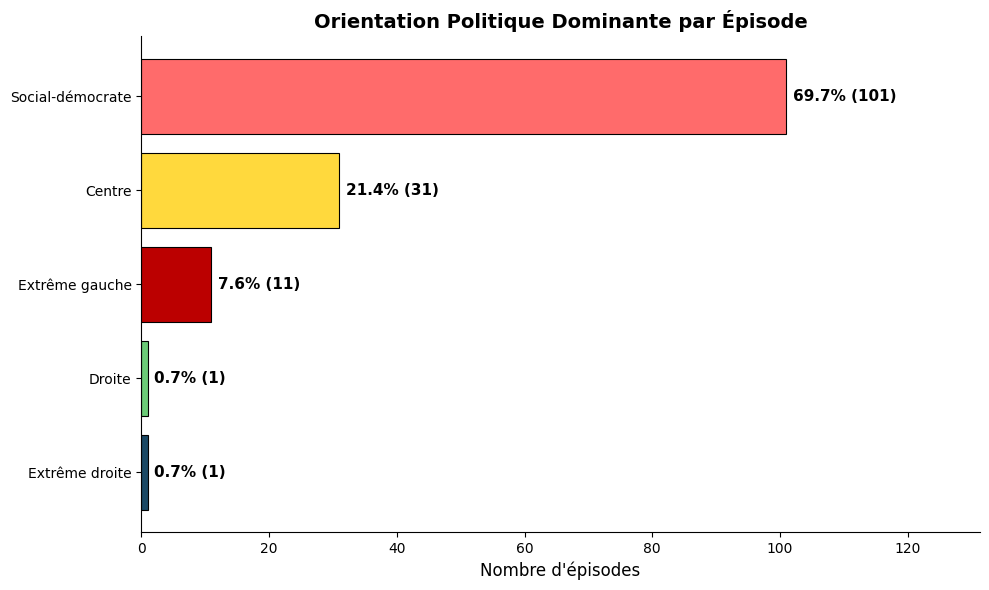

✅ Image sauvegardée : dominant_orientation.png

📊 Résumé:
   Social-démocrate: 101 épisodes (69.7%)
   Centre: 31 épisodes (21.4%)
   Extrême gauche: 11 épisodes (7.6%)
   Droite: 1 épisodes (0.7%)
   Extrême droite: 1 épisodes (0.7%)


In [24]:
# ========================================
# GRAPHIQUE: ORIENTATION POLITIQUE DOMINANTE PAR ÉPISODE
# ========================================
import json
import matplotlib.pyplot as plt

# Charger les données (si pas déjà fait)
with open('political_analysis.json', 'r', encoding='utf-8') as f:
    political = json.load(f)

# Filtrer les analyses réussies
successful = [r for r in political if r.get('status') == 'success' and 'analysis' in r]

# Catégories politiques
categories = ['extreme_gauche', 'social_democrate', 'centre', 'droite', 'extreme_droite']
labels_fr = ['Extrême gauche', 'Social-démocrate', 'Centre', 'Droite', 'Extrême droite']
colors = ['#BB0000', '#FF6B6B', '#FFD93D', '#6BCB77', '#1B4965']

# Calculer l'orientation dominante pour chaque épisode
dominant_counts = {cat: 0 for cat in categories}

for r in successful:
    analysis = r.get('analysis', {}).get('analyse_globale', {})
    scores = {cat: analysis.get(cat, 0) for cat in categories}
    dominant = max(scores, key=scores.get)
    dominant_counts[dominant] += 1

# Préparer les données pour le graphique (triées par nombre décroissant)
data = [(label, dominant_counts[cat], color) for cat, label, color in zip(categories, labels_fr, colors)]
data_sorted = sorted(data, key=lambda x: x[1], reverse=True)

labels_sorted = [d[0] for d in data_sorted]
episodes_sorted = [d[1] for d in data_sorted]
colors_sorted = [d[2] for d in data_sorted]

total = sum(episodes_sorted)
percentages_sorted = [e / total * 100 for e in episodes_sorted]

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(labels_sorted, episodes_sorted, color=colors_sorted, edgecolor='black', linewidth=0.8)

# Ajouter les valeurs sur les barres
for bar, pct, n in zip(bars, percentages_sorted, episodes_sorted):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}% ({n})', ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Nombre d\'épisodes', fontsize=12)
ax.set_title('Orientation Politique Dominante par Épisode', fontsize=14, fontweight='bold')
ax.set_xlim(0, max(episodes_sorted) * 1.3)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('dominant_orientation.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Image sauvegardée : dominant_orientation.png")
print(f"\n📊 Résumé:")
for label, n, pct in zip(labels_sorted, episodes_sorted, percentages_sorted):
    print(f"   {label}: {n} épisodes ({pct:.1f}%)")

Analyse de 145 émissions

Émissions uniques: 11
Épisodes analysés: 145
Intervenants totaux: 764


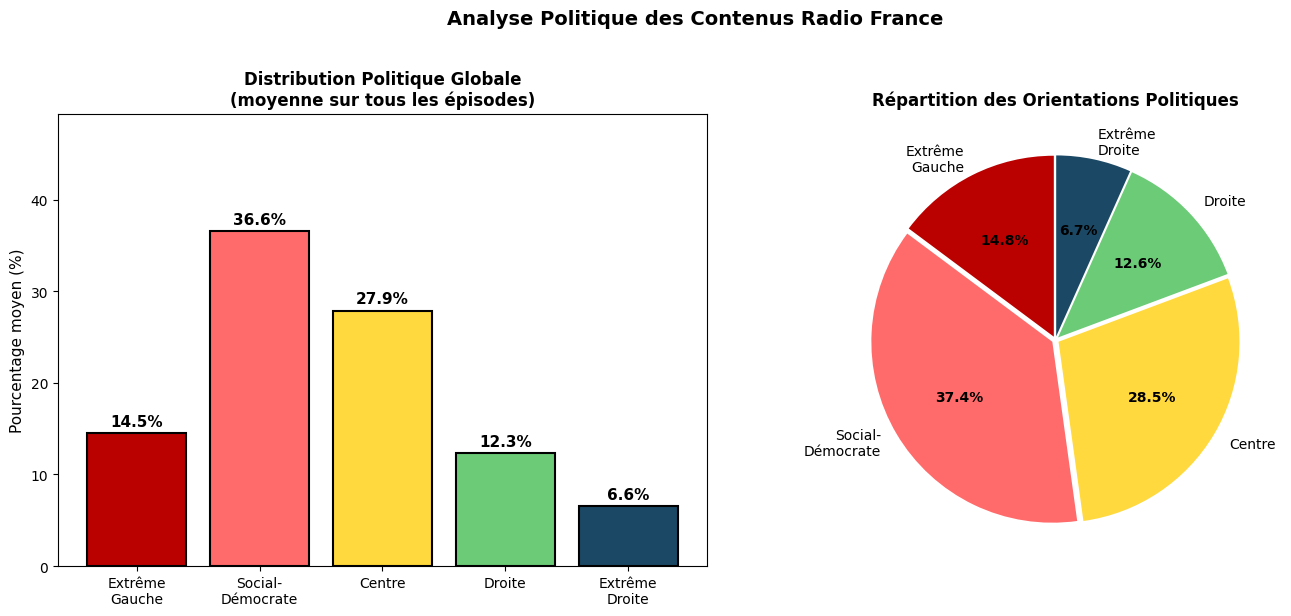

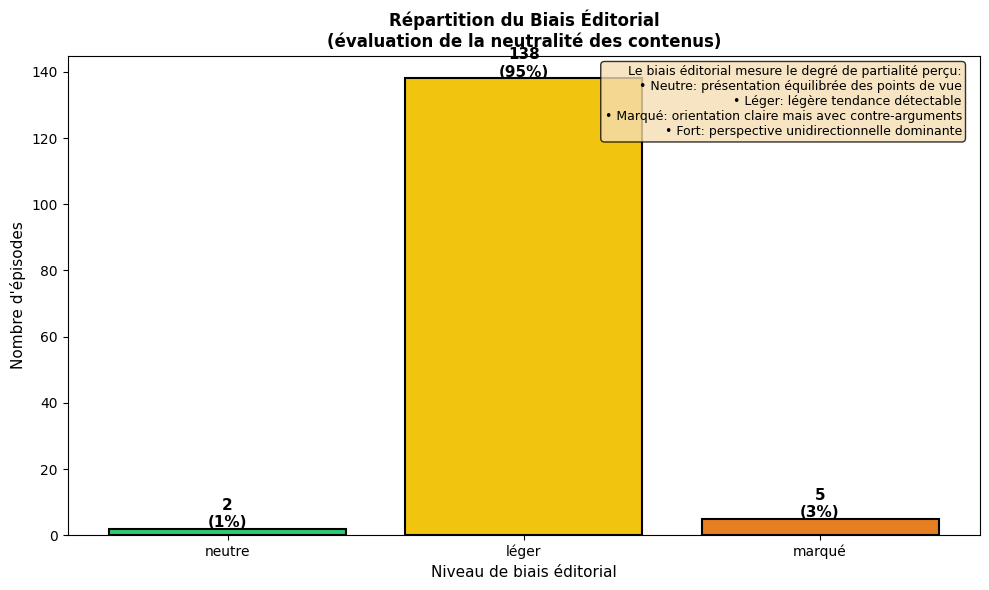

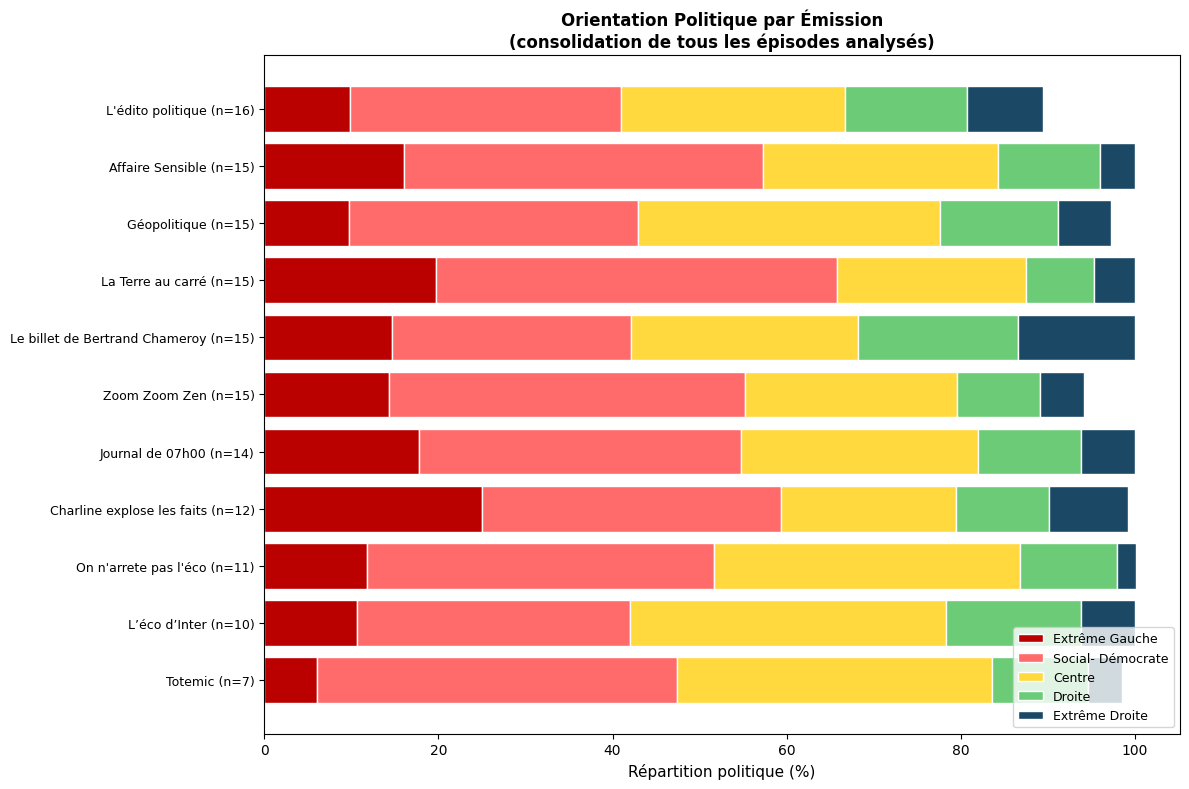

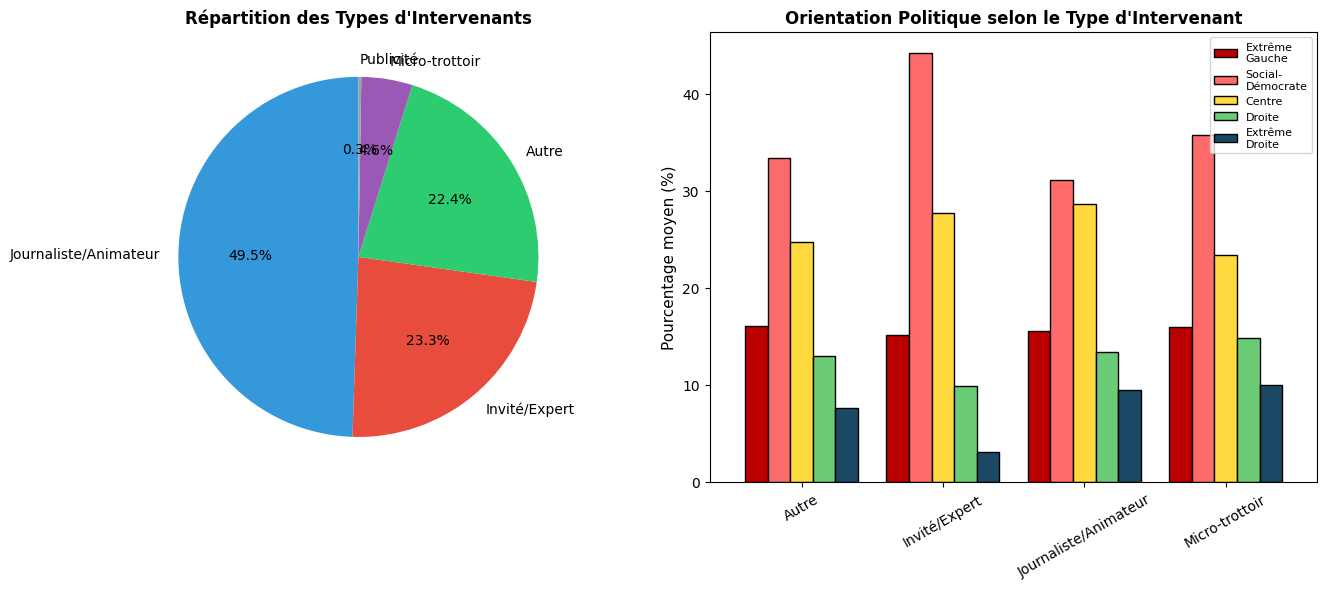

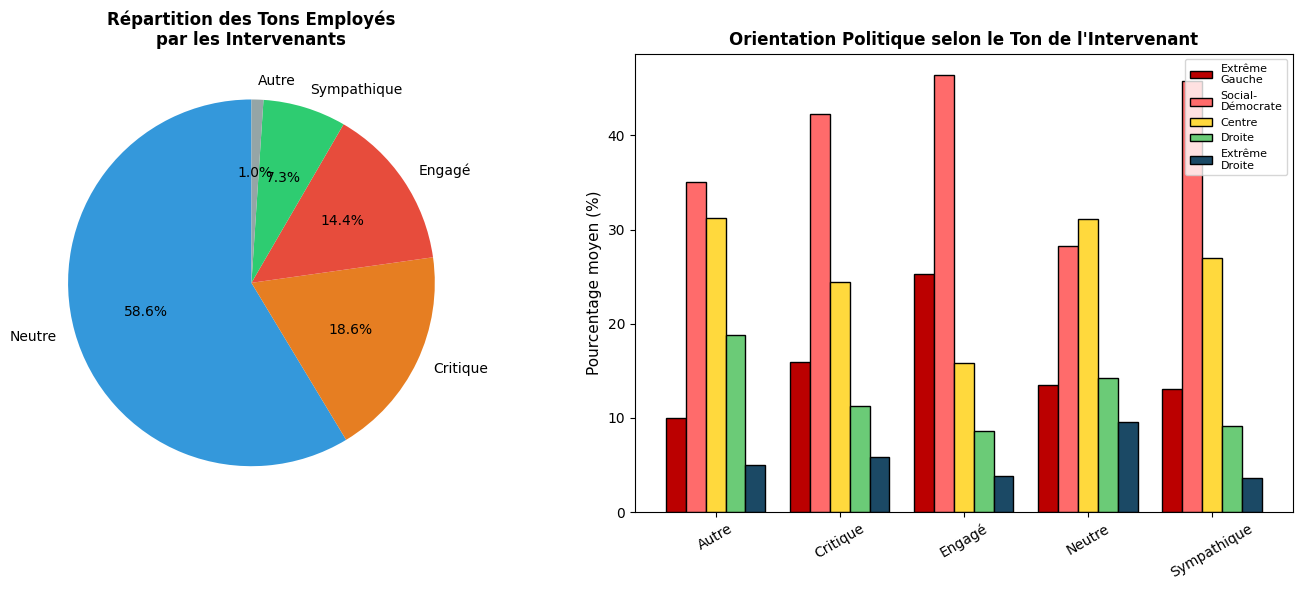

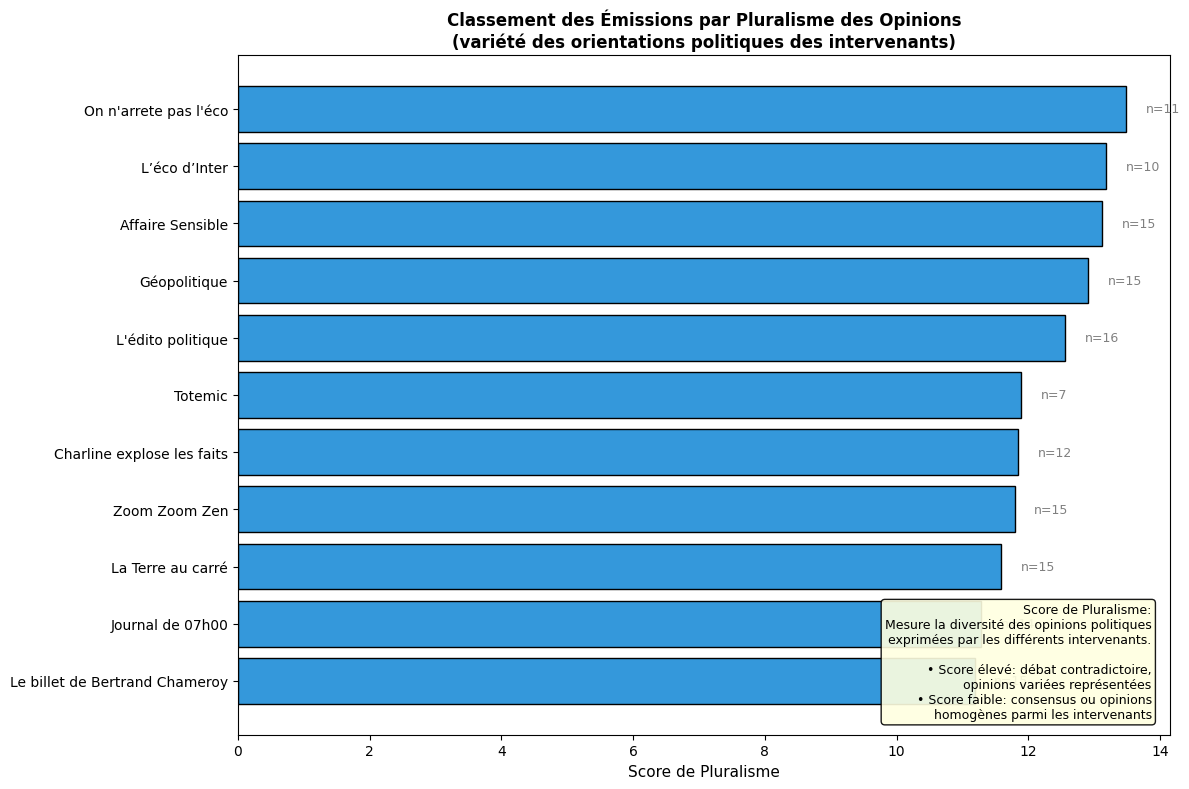

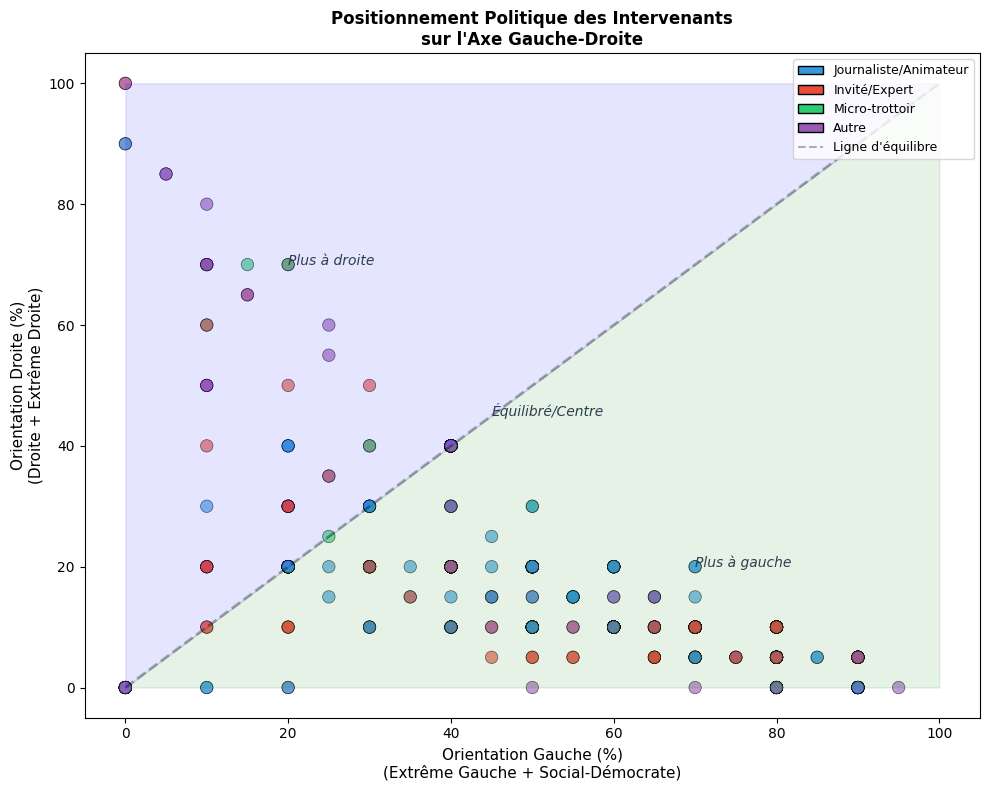

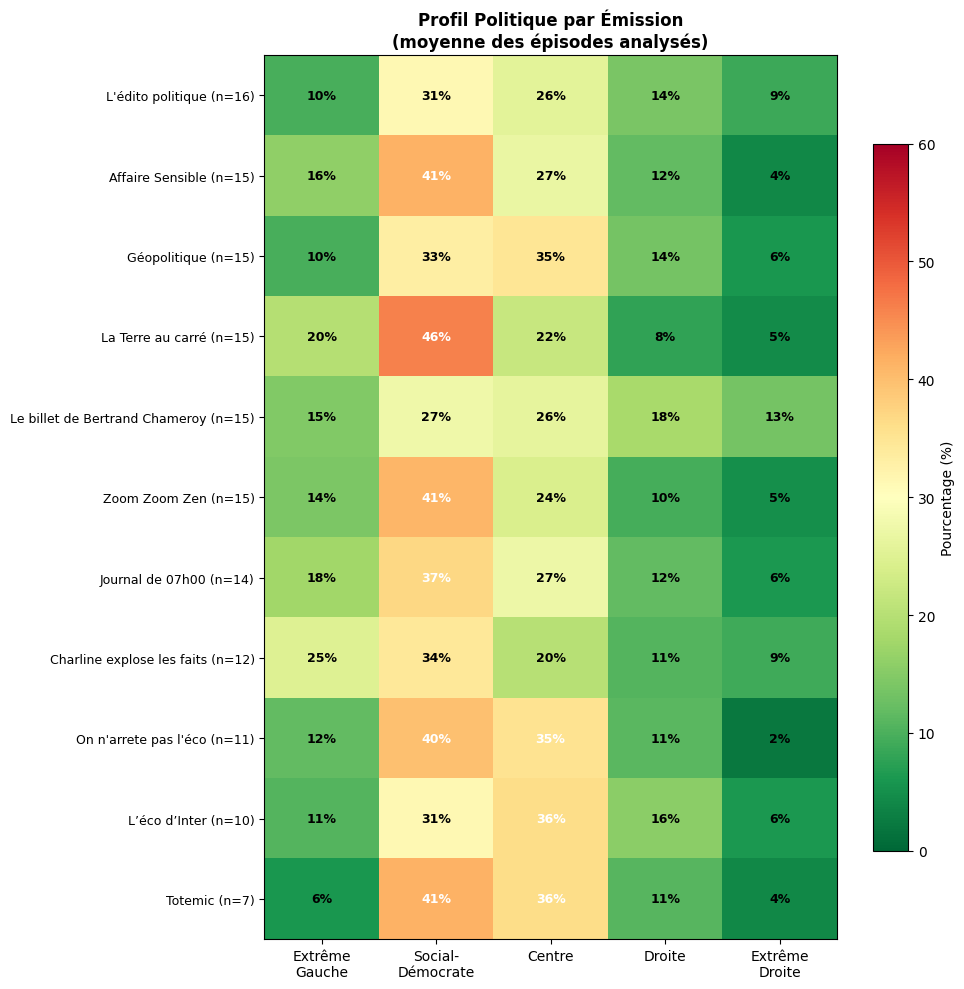


RÉSUMÉ DE L'ANALYSE POLITIQUE

📊 DONNÉES ANALYSÉES:
   • Émissions différentes: 11
   • Épisodes totaux: 145
   • Intervenants analysés: 764
   • Intervenants par épisode (moyenne): 5.3

📈 ORIENTATION POLITIQUE MOYENNE (sur l'ensemble des épisodes):
   --------------------------------------------------
   Extrême Gauche   :  14.5% ███████
   Social-Démocrate :  36.6% ██████████████████
   Centre           :  27.9% █████████████
   Droite           :  12.3% ██████
   Extrême Droite   :   6.6% ███
   --------------------------------------------------
   Total Gauche:       51.1%
   Total Droite:       18.9%
   Centre:             27.9%

🎭 BIAIS ÉDITORIAL:
   • Léger     : 138 épisodes ( 95.2%)
   • Marqué    :   5 épisodes (  3.4%)
   • Neutre    :   2 épisodes (  1.4%)

👥 TYPES D'INTERVENANTS:
   • Journaliste/Animateur:  378 ( 49.5%)
   • Invité/Expert       :  178 ( 23.3%)
   • Autre               :  171 ( 22.4%)
   • Micro-trottoir      :   35 (  4.6%)
   • Publicité           :    

In [19]:
# ========================================
# ANALYSE POLITIQUE - VERSION AMÉLIORÉE
# ========================================
"""
Améliorations apportées:
1. Consolidation par émission (pas par titre)
2. Explications claires en français pour chaque métrique
3. Score de diversité expliqué et renommé
4. Meilleure lisibilité des graphiques
5. Ajout de légendes explicatives
"""

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Configuration du style
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'

# Load results
with open('political_analysis.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Filter successful
successful = [r for r in results if r.get('status') == 'success']
print(f"Analyse de {len(successful)} émissions\n")

# Political categories
categories = ['extreme_gauche', 'social_democrate', 'centre', 'droite', 'extreme_droite']
labels_fr = ['Extrême\nGauche', 'Social-\nDémocrate', 'Centre', 'Droite', 'Extrême\nDroite']
colors = ['#BB0000', '#FF6B6B', '#FFD93D', '#6BCB77', '#1B4965']

# ========================================
# 1. EXTRACTION ET CONSOLIDATION DES DONNÉES
# ========================================

# AMÉLIORATION: Extraire le vrai nom d'émission (pas le titre)
def get_emission_name(r):
    """
    Récupère le nom de l'émission (pas le titre de l'épisode).
    Le champ 'emission' contient le nom du programme.
    """
    emission = r.get('emission', '')
    # Si l'émission est vide ou trop longue (c'est peut-être un titre),
    # essayer d'autres stratégies
    if not emission or len(emission) > 50:
        # Fallback: utiliser le titre tronqué
        return r.get('title', r.get('Title', 'Inconnu'))[:30]
    return emission

# Données par épisode
episode_data = []
for r in successful:
    analysis = r.get('analysis', {}).get('analyse_globale', {})
    episode_data.append({
        'emission': get_emission_name(r),  # Nom du programme
        'titre_episode': r.get('title', r.get('Title', 'Unknown'))[:80],  # Titre de l'épisode
        'extreme_gauche': analysis.get('extreme_gauche', 0),
        'social_democrate': analysis.get('social_democrate', 0),
        'centre': analysis.get('centre', 0),
        'droite': analysis.get('droite', 0),
        'extreme_droite': analysis.get('extreme_droite', 0),
        'biais_editorial': analysis.get('biais_editorial', 'unknown'),
        'num_speakers': r.get('num_speakers', 0)
    })

df_episodes = pd.DataFrame(episode_data)

# AMÉLIORATION: Consolidation par émission (agrégation des épisodes)
df_emissions = df_episodes.groupby('emission').agg({
    'extreme_gauche': 'mean',
    'social_democrate': 'mean',
    'centre': 'mean',
    'droite': 'mean',
    'extreme_droite': 'mean',
    'num_speakers': 'mean',
    'titre_episode': 'count'  # Nombre d'épisodes analysés
}).rename(columns={'titre_episode': 'nb_episodes'}).reset_index()

# Données des intervenants
speaker_data = []
for r in successful:
    speakers = r.get('analysis', {}).get('speakers', {})
    emission_name = get_emission_name(r)
    for speaker_id, speaker_info in speakers.items():
        speaker_data.append({
            'emission': emission_name,
            'speaker_id': speaker_id,
            'role': speaker_info.get('role_probable', 'unknown'),
            'ton': speaker_info.get('ton', 'unknown'),
            'extreme_gauche': speaker_info.get('extreme_gauche', 0),
            'social_democrate': speaker_info.get('social_democrate', 0),
            'centre': speaker_info.get('centre', 0),
            'droite': speaker_info.get('droite', 0),
            'extreme_droite': speaker_info.get('extreme_droite', 0),
            'description': speaker_info.get('description', '')
        })

df_speakers = pd.DataFrame(speaker_data)

print(f"Émissions uniques: {len(df_emissions)}")
print(f"Épisodes analysés: {len(df_episodes)}")
print(f"Intervenants totaux: {len(df_speakers)}")

# ========================================
# 2. DISTRIBUTION POLITIQUE GLOBALE
# ========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Moyennes pondérées sur tous les épisodes
averages = df_episodes[categories].mean()

# Graphique en barres
bars = axes[0].bar(labels_fr, averages.values, color=colors, edgecolor='black', linewidth=1.5)
for bar, val in zip(bars, averages.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8,
                 f'{val:.1f}%', ha='center', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Pourcentage moyen (%)', fontsize=11)
axes[0].set_title('Distribution Politique Globale\n(moyenne sur tous les épisodes)', fontweight='bold', fontsize=12)
axes[0].set_ylim(0, max(averages.values) * 1.35)

# Graphique circulaire
wedges, texts, autotexts = axes[1].pie(
    averages.values, labels=labels_fr, colors=colors, autopct='%1.1f%%',
    startangle=90, explode=[0.02]*5, textprops={'fontsize': 10}
)
for autotext in autotexts:
    autotext.set_fontweight('bold')
axes[1].set_title('Répartition des Orientations Politiques', fontweight='bold', fontsize=12)

plt.suptitle('Analyse Politique des Contenus Radio France', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('viz_01_distribution_globale.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 3. DISTRIBUTION DU BIAIS ÉDITORIAL
# ========================================
fig, ax = plt.subplots(figsize=(10, 6))

bias_counts = df_episodes['biais_editorial'].value_counts()

# Ordre logique des biais
bias_order = ['neutre', 'léger', 'marqué', 'fort']
bias_counts = bias_counts.reindex([b for b in bias_order if b in bias_counts.index])

bias_colors = {'neutre': '#2ecc71', 'léger': '#f1c40f', 'marqué': '#e67e22', 'fort': '#e74c3c'}
colors_list = [bias_colors.get(b, '#95a5a6') for b in bias_counts.index]

bars = ax.bar(bias_counts.index, bias_counts.values, color=colors_list, edgecolor='black', linewidth=1.5)
for bar, val in zip(bars, bias_counts.values):
    pct = val / len(df_episodes) * 100
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{val}\n({pct:.0f}%)', ha='center', fontweight='bold', fontsize=11)

ax.set_ylabel('Nombre d\'épisodes', fontsize=11)
ax.set_xlabel('Niveau de biais éditorial', fontsize=11)
ax.set_title('Répartition du Biais Éditorial\n(évaluation de la neutralité des contenus)', fontweight='bold', fontsize=12)

# Légende explicative
explanation = """
Le biais éditorial mesure le degré de partialité perçu:
• Neutre: présentation équilibrée des points de vue
• Léger: légère tendance détectable
• Marqué: orientation claire mais avec contre-arguments
• Fort: perspective unidirectionnelle dominante
"""
ax.text(0.98, 0.98, explanation.strip(), transform=ax.transAxes, fontsize=9,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('viz_02_biais_editorial.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 4. ORIENTATION PAR ÉMISSION (CONSOLIDÉ)
# ========================================
fig, ax = plt.subplots(figsize=(12, 8))

# Trier par nombre d'épisodes (les plus représentées d'abord)
df_top_emissions = df_emissions.nlargest(15, 'nb_episodes')

# Créer un graphique en barres empilées horizontales
y_pos = range(len(df_top_emissions))
left = np.zeros(len(df_top_emissions))

for i, (cat, color, label) in enumerate(zip(categories, colors, labels_fr)):
    values = df_top_emissions[cat].values
    bars = ax.barh(y_pos, values, left=left, color=color, label=label.replace('\n', ' '), edgecolor='white')
    left += values

ax.set_yticks(y_pos)
# Afficher le nom de l'émission + nombre d'épisodes analysés
ylabels = [f"{row['emission']} (n={int(row['nb_episodes'])})" for _, row in df_top_emissions.iterrows()]
ax.set_yticklabels(ylabels, fontsize=9)
ax.set_xlabel('Répartition politique (%)', fontsize=11)
ax.set_title('Orientation Politique par Émission\n(consolidation de tous les épisodes analysés)', fontweight='bold', fontsize=12)
ax.legend(loc='lower right', fontsize=9)
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('viz_03_orientation_par_emission.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 5. ANALYSE DES RÔLES DES INTERVENANTS
# ========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Normalisation des rôles
def normalize_role(role):
    role = str(role).lower()
    if 'journaliste' in role or 'animateur' in role:
        return 'Journaliste/Animateur'
    elif 'invité' in role or 'expert' in role or 'analyste' in role:
        return 'Invité/Expert'
    elif 'micro' in role or 'rue' in role or 'trottoir' in role:
        return 'Micro-trottoir'
    elif 'publicité' in role or 'commercial' in role:
        return 'Publicité'
    else:
        return 'Autre'

df_speakers['role_normalise'] = df_speakers['role'].apply(normalize_role)
role_counts = df_speakers['role_normalise'].value_counts()

# Graphique circulaire des rôles
role_colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#95a5a6']
wedges, texts, autotexts = axes[0].pie(
    role_counts.values, labels=role_counts.index, colors=role_colors[:len(role_counts)],
    autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}
)
axes[0].set_title('Répartition des Types d\'Intervenants', fontweight='bold', fontsize=12)

# Orientation politique par rôle (excluant publicité)
df_speakers_no_pub = df_speakers[df_speakers['role_normalise'] != 'Publicité']
role_political = df_speakers_no_pub.groupby('role_normalise')[categories].mean()

role_political.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black', width=0.8)
axes[1].set_ylabel('Pourcentage moyen (%)', fontsize=11)
axes[1].set_xlabel('')
axes[1].set_title('Orientation Politique selon le Type d\'Intervenant', fontweight='bold', fontsize=12)
axes[1].legend(labels_fr, loc='upper right', fontsize=8)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig('viz_04_roles_intervenants.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 6. ANALYSE DES TONS
# ========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Normalisation des tons
def normalize_tone(tone):
    tone = str(tone).lower()
    if 'neutre' in tone:
        return 'Neutre'
    elif 'engagé' in tone:
        return 'Engagé'
    elif 'critique' in tone or 'hostile' in tone:
        return 'Critique'
    elif 'sympathique' in tone or 'positif' in tone:
        return 'Sympathique'
    else:
        return 'Autre'

df_speakers['ton_normalise'] = df_speakers['ton'].apply(normalize_tone)
tone_counts = df_speakers['ton_normalise'].value_counts()

# Graphique circulaire des tons
tone_colors = {'Neutre': '#3498db', 'Engagé': '#e74c3c', 'Critique': '#e67e22', 
               'Sympathique': '#2ecc71', 'Autre': '#95a5a6'}
colors_tone = [tone_colors.get(t, '#95a5a6') for t in tone_counts.index]

wedges, texts, autotexts = axes[0].pie(
    tone_counts.values, labels=tone_counts.index, colors=colors_tone,
    autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}
)
axes[0].set_title('Répartition des Tons Employés\npar les Intervenants', fontweight='bold', fontsize=12)

# Orientation politique par ton
tone_political = df_speakers.groupby('ton_normalise')[categories].mean()
tone_political.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black', width=0.8)
axes[1].set_ylabel('Pourcentage moyen (%)', fontsize=11)
axes[1].set_xlabel('')
axes[1].set_title('Orientation Politique selon le Ton de l\'Intervenant', fontweight='bold', fontsize=12)
axes[1].legend(labels_fr, loc='upper right', fontsize=8)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig('viz_05_tons.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 7. PLURALISME DES OPINIONS (anciennement "diversité")
# ========================================
fig, ax = plt.subplots(figsize=(12, 8))

def calc_pluralisme(emission_name):
    """
    Le score de pluralisme mesure la variété des opinions politiques
    exprimées au sein d'une émission.
    
    Calcul: écart-type moyen des orientations politiques des intervenants.
    
    - Score élevé = grande variété d'opinions (débat contradictoire)
    - Score faible = opinions homogènes (consensus ou biais)
    """
    speakers = df_speakers[df_speakers['emission'] == emission_name]
    if len(speakers) < 2:
        return 0
    return speakers[categories].std().mean()

df_emissions['score_pluralisme'] = df_emissions['emission'].apply(calc_pluralisme)

# Top 15 émissions les plus pluralistes
top_pluralisme = df_emissions[df_emissions['nb_episodes'] >= 1].nlargest(15, 'score_pluralisme')

bars = ax.barh(range(len(top_pluralisme)), top_pluralisme['score_pluralisme'], 
               color='#3498db', edgecolor='black')

# Ajouter le nombre d'épisodes à côté
for i, (idx, row) in enumerate(top_pluralisme.iterrows()):
    ax.text(row['score_pluralisme'] + 0.3, i, f"n={int(row['nb_episodes'])}", 
            va='center', fontsize=9, color='gray')

ax.set_yticks(range(len(top_pluralisme)))
ax.set_yticklabels(top_pluralisme['emission'], fontsize=10)
ax.set_xlabel('Score de Pluralisme', fontsize=11)
ax.set_title('Classement des Émissions par Pluralisme des Opinions\n(variété des orientations politiques des intervenants)', 
             fontweight='bold', fontsize=12)
ax.invert_yaxis()

# Explication du score
explanation = """
Score de Pluralisme:
Mesure la diversité des opinions politiques
exprimées par les différents intervenants.

• Score élevé: débat contradictoire,
  opinions variées représentées
• Score faible: consensus ou opinions
  homogènes parmi les intervenants
"""
ax.text(0.98, 0.02, explanation.strip(), transform=ax.transAxes, fontsize=9,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.savefig('viz_06_pluralisme.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 8. SPECTRE POLITIQUE DES INTERVENANTS
# ========================================
fig, ax = plt.subplots(figsize=(10, 8))

# Score gauche-droite pour chaque intervenant
df_speakers['score_gauche'] = df_speakers['extreme_gauche'] + df_speakers['social_democrate']
df_speakers['score_droite'] = df_speakers['droite'] + df_speakers['extreme_droite']

# Couleur par rôle (excluant publicité)
df_plot = df_speakers[df_speakers['role_normalise'] != 'Publicité'].copy()
role_color_map = {
    'Journaliste/Animateur': '#3498db', 
    'Invité/Expert': '#e74c3c', 
    'Micro-trottoir': '#2ecc71', 
    'Autre': '#9b59b6'
}
colors_scatter = df_plot['role_normalise'].map(role_color_map)

scatter = ax.scatter(df_plot['score_gauche'], df_plot['score_droite'],
                     c=colors_scatter, alpha=0.6, s=80, edgecolors='black', linewidth=0.5)

# Ligne d'équilibre
ax.plot([0, 100], [0, 100], 'k--', alpha=0.3, linewidth=2)
ax.fill_between([0, 100], [0, 100], [100, 100], alpha=0.1, color='blue', label='Zone Gauche')
ax.fill_between([0, 100], [0, 0], [0, 100], alpha=0.1, color='green', label='Zone Droite')

ax.set_xlabel('Orientation Gauche (%)\n(Extrême Gauche + Social-Démocrate)', fontsize=11)
ax.set_ylabel('Orientation Droite (%)\n(Droite + Extrême Droite)', fontsize=11)
ax.set_title('Positionnement Politique des Intervenants\nsur l\'Axe Gauche-Droite', fontweight='bold', fontsize=12)

# Légende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c, label=r, edgecolor='black') for r, c in role_color_map.items()]
legend_elements.append(plt.Line2D([0], [0], linestyle='--', color='black', alpha=0.3, label='Ligne d\'équilibre'))
ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)

# Annotations des zones
ax.annotate('Plus à gauche', xy=(70, 20), fontsize=10, color='#2c3e50', style='italic')
ax.annotate('Plus à droite', xy=(20, 70), fontsize=10, color='#2c3e50', style='italic')
ax.annotate('Équilibré/Centre', xy=(45, 45), fontsize=10, color='#2c3e50', style='italic')

plt.tight_layout()
plt.savefig('viz_07_spectre_politique.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 9. HEATMAP PAR ÉMISSION (CONSOLIDÉ)
# ========================================
fig, ax = plt.subplots(figsize=(10, 10))

# Prendre les émissions avec le plus d'épisodes
df_heatmap = df_emissions.nlargest(20, 'nb_episodes')

heatmap_data = df_heatmap[categories].values
im = ax.imshow(heatmap_data, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=60)

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(labels_fr, fontsize=10)
ax.set_yticks(range(len(df_heatmap)))

# Labels avec nombre d'épisodes
ylabels = [f"{row['emission']} (n={int(row['nb_episodes'])})" for _, row in df_heatmap.iterrows()]
ax.set_yticklabels(ylabels, fontsize=9)

# Valeurs dans les cellules
for i in range(len(df_heatmap)):
    for j in range(len(categories)):
        val = heatmap_data[i, j]
        color = 'white' if val > 35 else 'black'
        ax.text(j, i, f'{val:.0f}%', ha='center', va='center', color=color, fontsize=9, fontweight='bold')

cbar = plt.colorbar(im, ax=ax, label='Pourcentage (%)', shrink=0.8)
ax.set_title('Profil Politique par Émission\n(moyenne des épisodes analysés)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('viz_08_heatmap_emissions.png', dpi=150, bbox_inches='tight')
plt.show()

# ========================================
# 10. RÉSUMÉ STATISTIQUE
# ========================================
print("\n" + "="*70)
print("RÉSUMÉ DE L'ANALYSE POLITIQUE")
print("="*70)

print("\n📊 DONNÉES ANALYSÉES:")
print(f"   • Émissions différentes: {len(df_emissions)}")
print(f"   • Épisodes totaux: {len(df_episodes)}")
print(f"   • Intervenants analysés: {len(df_speakers)}")
print(f"   • Intervenants par épisode (moyenne): {len(df_speakers)/len(df_episodes):.1f}")

print("\n📈 ORIENTATION POLITIQUE MOYENNE (sur l'ensemble des épisodes):")
print("   " + "-"*50)
for cat, label in zip(categories, ['Extrême Gauche', 'Social-Démocrate', 'Centre', 'Droite', 'Extrême Droite']):
    val = df_episodes[cat].mean()
    bar = "█" * int(val/2)
    print(f"   {label:17}: {val:5.1f}% {bar}")

# Score gauche vs droite global
gauche_total = df_episodes['extreme_gauche'].mean() + df_episodes['social_democrate'].mean()
droite_total = df_episodes['droite'].mean() + df_episodes['extreme_droite'].mean()
print("   " + "-"*50)
print(f"   Total Gauche:      {gauche_total:5.1f}%")
print(f"   Total Droite:      {droite_total:5.1f}%")
print(f"   Centre:            {df_episodes['centre'].mean():5.1f}%")

print("\n🎭 BIAIS ÉDITORIAL:")
for bias, count in df_episodes['biais_editorial'].value_counts().items():
    pct = count/len(df_episodes)*100
    print(f"   • {bias.capitalize():10}: {count:3} épisodes ({pct:5.1f}%)")

print("\n👥 TYPES D'INTERVENANTS:")
for role, count in df_speakers['role_normalise'].value_counts().items():
    pct = count/len(df_speakers)*100
    print(f"   • {role:20}: {count:4} ({pct:5.1f}%)")

print("\n🗣️ TONS EMPLOYÉS:")
for tone, count in df_speakers['ton_normalise'].value_counts().items():
    pct = count/len(df_speakers)*100
    print(f"   • {tone:12}: {count:4} ({pct:5.1f}%)")

print("\n" + "="*70)
print("📁 FICHIERS GÉNÉRÉS:")
print("   • viz_01_distribution_globale.png")
print("   • viz_02_biais_editorial.png")
print("   • viz_03_orientation_par_emission.png")
print("   • viz_04_roles_intervenants.png")
print("   • viz_05_tons.png")
print("   • viz_06_pluralisme.png")
print("   • viz_07_spectre_politique.png")
print("   • viz_08_heatmap_emissions.png")
print("="*70)

In [20]:
"""
Script pour extraire les statistiques clés de l'analyse politique Radio France.
Exécute ce script et copie-colle le résultat à Claude pour mettre à jour le README.
"""

import json
from collections import Counter, defaultdict

# ========================================
# CHARGER LES DONNÉES
# ========================================
with open('political_analysis.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# ========================================
# STATISTIQUES DE BASE
# ========================================
total = len(results)
successful = [r for r in results if r.get('status') == 'success']
failed = [r for r in results if r.get('status') != 'success']

print("=" * 60)
print("STATISTIQUES POUR CLAUDE - COPIER-COLLER CI-DESSOUS")
print("=" * 60)

print(f"""
## 📊 STATISTIQUES GÉNÉRALES
- Nombre total d'épisodes traités : {total}
- Analyses réussies : {len(successful)} ({len(successful)/total*100:.1f}%)
- Analyses échouées : {len(failed)} ({len(failed)/total*100:.1f}%)
""")

# ========================================
# ÉMISSIONS ANALYSÉES
# ========================================
emissions = Counter(r.get('emission', 'Inconnu') for r in successful)
print("## 📻 ÉMISSIONS ANALYSÉES")
print(f"- Nombre d'émissions différentes : {len(emissions)}")
print("- Répartition :")
for emission, count in emissions.most_common(20):
    print(f"  - {emission}: {count} épisodes")

# ========================================
# STATISTIQUES SPEAKERS
# ========================================
total_speakers = sum(r.get('num_speakers', 0) for r in successful)
avg_speakers = total_speakers / len(successful) if successful else 0
max_speakers = max((r.get('num_speakers', 0) for r in successful), default=0)
min_speakers = min((r.get('num_speakers', 0) for r in successful), default=0)

print(f"""
## 🎙️ STATISTIQUES SPEAKERS
- Total de speakers identifiés : {total_speakers}
- Moyenne de speakers par épisode : {avg_speakers:.1f}
- Min speakers : {min_speakers}
- Max speakers : {max_speakers}
""")

# ========================================
# ORIENTATION POLITIQUE GLOBALE
# ========================================
categories = ['extreme_gauche', 'social_democrate', 'centre', 'droite', 'extreme_droite']
labels = {
    'extreme_gauche': 'Extrême gauche',
    'social_democrate': 'Social-démocrate', 
    'centre': 'Centre',
    'droite': 'Droite',
    'extreme_droite': 'Extrême droite'
}

# Moyennes globales
global_scores = {cat: [] for cat in categories}
for r in successful:
    analysis = r.get('analysis', {})
    global_analysis = analysis.get('analyse_globale', {})
    for cat in categories:
        val = global_analysis.get(cat)
        if val is not None:
            global_scores[cat].append(val)

print("## 🗳️ ORIENTATION POLITIQUE MOYENNE (analyse globale)")
for cat in categories:
    if global_scores[cat]:
        avg = sum(global_scores[cat]) / len(global_scores[cat])
        print(f"- {labels[cat]}: {avg:.1f}%")

# ========================================
# BIAIS ÉDITORIAL
# ========================================
biais_counts = Counter()
for r in successful:
    biais = r.get('analysis', {}).get('analyse_globale', {}).get('biais_editorial', 'inconnu')
    biais_counts[biais] += 1

print(f"""
## 📰 BIAIS ÉDITORIAL DÉTECTÉ
""")
for biais, count in biais_counts.most_common():
    pct = count / len(successful) * 100
    print(f"- {biais.capitalize()}: {count} épisodes ({pct:.1f}%)")

# ========================================
# ORIENTATION DOMINANTE
# ========================================
dominant_counts = Counter()
for r in successful:
    global_analysis = r.get('analysis', {}).get('analyse_globale', {})
    scores = {cat: global_analysis.get(cat, 0) for cat in categories}
    if any(scores.values()):
        dominant = max(scores, key=scores.get)
        dominant_counts[dominant] += 1

print(f"""
## 🏆 ORIENTATION DOMINANTE PAR ÉPISODE
""")
for cat in categories:
    count = dominant_counts.get(cat, 0)
    pct = count / len(successful) * 100 if successful else 0
    print(f"- {labels[cat]}: {count} épisodes ({pct:.1f}%)")

# ========================================
# ANALYSE PAR RÔLE DE SPEAKER
# ========================================
role_counts = Counter()
role_orientations = defaultdict(lambda: {cat: [] for cat in categories})

for r in successful:
    speakers = r.get('analysis', {}).get('speakers', {})
    for speaker_id, speaker_data in speakers.items():
        role = speaker_data.get('role_probable', 'inconnu')
        role_counts[role] += 1
        for cat in categories:
            val = speaker_data.get(cat)
            if val is not None:
                role_orientations[role][cat].append(val)

print(f"""
## 👥 RÔLES DES SPEAKERS IDENTIFIÉS
""")
for role, count in role_counts.most_common(10):
    print(f"- {role}: {count} occurrences")

# ========================================
# TONS DÉTECTÉS
# ========================================
ton_counts = Counter()
for r in successful:
    speakers = r.get('analysis', {}).get('speakers', {})
    for speaker_id, speaker_data in speakers.items():
        ton = speaker_data.get('ton', 'inconnu')
        ton_counts[ton] += 1

print(f"""
## 🎭 TONS DES SPEAKERS
""")
for ton, count in ton_counts.most_common():
    pct = count / sum(ton_counts.values()) * 100
    print(f"- {ton.capitalize()}: {count} ({pct:.1f}%)")

# ========================================
# TOP ÉPISODES LES PLUS MARQUÉS
# ========================================
print(f"""
## 🔥 TOP 5 ÉPISODES LES PLUS MARQUÉS POLITIQUEMENT
""")
episode_scores = []
for r in successful:
    global_analysis = r.get('analysis', {}).get('analyse_globale', {})
    scores = [global_analysis.get(cat, 0) for cat in categories]
    max_score = max(scores) if scores else 0
    episode_scores.append({
        'title': r.get('title', r.get('Title', 'Inconnu'))[:60],
        'emission': r.get('emission', 'Inconnu'),
        'max_score': max_score,
        'dominant': categories[scores.index(max_score)] if scores and max_score > 0 else 'N/A'
    })

episode_scores.sort(key=lambda x: x['max_score'], reverse=True)
for i, ep in enumerate(episode_scores[:5], 1):
    print(f"{i}. **{ep['title']}**")
    print(f"   - Émission: {ep['emission']}")
    print(f"   - Orientation dominante: {labels.get(ep['dominant'], ep['dominant'])} ({ep['max_score']:.0f}%)")

# ========================================
# TOP ÉPISODES LES PLUS NEUTRES
# ========================================
print(f"""
## ⚖️ TOP 5 ÉPISODES LES PLUS NEUTRES (scores équilibrés)
""")
for ep in episode_scores:
    global_analysis = next((r.get('analysis', {}).get('analyse_globale', {}) 
                           for r in successful 
                           if r.get('title', r.get('Title', ''))[:60] == ep['title']), {})
    scores = [global_analysis.get(cat, 0) for cat in categories]
    if scores:
        # Calculer l'écart-type (plus bas = plus équilibré)
        mean = sum(scores) / len(scores)
        variance = sum((s - mean) ** 2 for s in scores) / len(scores)
        ep['std'] = variance ** 0.5

episode_scores_neutral = sorted([e for e in episode_scores if 'std' in e], key=lambda x: x['std'])
for i, ep in enumerate(episode_scores_neutral[:5], 1):
    print(f"{i}. **{ep['title']}**")
    print(f"   - Émission: {ep['emission']}")
    print(f"   - Écart-type: {ep['std']:.1f} (plus bas = plus équilibré)")

# ========================================
# RÉSUMÉ FINAL
# ========================================
avg_all = {cat: sum(global_scores[cat])/len(global_scores[cat]) if global_scores[cat] else 0 
           for cat in categories}
dominant_global = max(avg_all, key=avg_all.get)

print(f"""
## 📝 RÉSUMÉ EXÉCUTIF

Sur **{len(successful)} épisodes** analysés provenant de **{len(emissions)} émissions** différentes:

- **Orientation moyenne dominante**: {labels[dominant_global]} ({avg_all[dominant_global]:.1f}%)
- **Biais éditorial le plus fréquent**: {biais_counts.most_common(1)[0][0] if biais_counts else 'N/A'}
- **Nombre total de speakers analysés**: {total_speakers}
- **Rôle de speaker le plus fréquent**: {role_counts.most_common(1)[0][0] if role_counts else 'N/A'}

### Répartition politique moyenne:
| Orientation | Pourcentage |
|-------------|-------------|
| Extrême gauche | {avg_all['extreme_gauche']:.1f}% |
| Social-démocrate | {avg_all['social_democrate']:.1f}% |
| Centre | {avg_all['centre']:.1f}% |
| Droite | {avg_all['droite']:.1f}% |
| Extrême droite | {avg_all['extreme_droite']:.1f}% |
""")

print("=" * 60)
print("FIN DES STATISTIQUES - COPIER TOUT CE QUI EST AU-DESSUS")
print("=" * 60)

STATISTIQUES POUR CLAUDE - COPIER-COLLER CI-DESSOUS

## 📊 STATISTIQUES GÉNÉRALES
- Nombre total d'épisodes traités : 145
- Analyses réussies : 145 (100.0%)
- Analyses échouées : 0 (0.0%)

## 📻 ÉMISSIONS ANALYSÉES
- Nombre d'émissions différentes : 11
- Répartition :
  - L'édito politique: 16 épisodes
  - Géopolitique: 15 épisodes
  - Zoom Zoom Zen: 15 épisodes
  - Le billet de Bertrand Chameroy: 15 épisodes
  - La Terre au carré: 15 épisodes
  - Affaire Sensible: 15 épisodes
  - Journal de 07h00: 14 épisodes
  - Charline explose les faits: 12 épisodes
  - On n'arrete pas l'éco: 11 épisodes
  - L’éco d’Inter: 10 épisodes
  - Totemic: 7 épisodes

## 🎙️ STATISTIQUES SPEAKERS
- Total de speakers identifiés : 764
- Moyenne de speakers par épisode : 5.3
- Min speakers : 1
- Max speakers : 10

## 🗳️ ORIENTATION POLITIQUE MOYENNE (analyse globale)
- Extrême gauche: 14.5%
- Social-démocrate: 36.6%
- Centre: 27.9%
- Droite: 12.3%
- Extrême droite: 6.6%

## 📰 BIAIS ÉDITORIAL DÉTECTÉ

- Léger: 138

## Calibration